In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



In [3]:
print ("-"*80)
print("Food delivery delay analysis- Exploratory Data Analysis")
print ("-"*80)

#loading dataset
df = pd.read_csv('C:\\Users\\apurv\\OneDrive\\Desktop\\food delivery project\\mumbai_food_orders.csv')

#display total rows and columns
print(f" - Total rows: {df.shape[0]:,}")
print(f" - Total columns: {df.shape[1]}")

#display forst 5 rows
print(df.head())

--------------------------------------------------------------------------------
Food delivery delay analysis- Exploratory Data Analysis
--------------------------------------------------------------------------------
 - Total rows: 5,000
 - Total columns: 25
     order_id    order_datetime day_of_week  hour_of_day  is_weekend  \
0  ORD_000001  02-08-2024 16:11      Friday           16       False   
1  ORD_000002  06-06-2024 19:48    Thursday           19       False   
2  ORD_000003  10-11-2024 10:56      Sunday           10        True   
3  ORD_000004  24-01-2024 21:32   Wednesday           21       False   
4  ORD_000005  23-04-2024 12:47     Tuesday           12       False   

   is_peak_hour  month restaurant_id restaurant_locality cuisine_type  ...  \
0         False      8     REST_0115           Khar West      Italian  ...   
1          True      6     REST_0018         Mulund West    Beverages  ...   
2         False     11     REST_0116          Malad East    Beverages  ..

In [4]:
print ("\n" + "-"*80)
print("Display data types and basic information")
print ("-"*80)

#dataset info
print(df.info())

#datatypes
print(df.dtypes)


--------------------------------------------------------------------------------
Display data types and basic information
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   order_id                     5000 non-null   object 
 1   order_datetime               5000 non-null   object 
 2   day_of_week                  5000 non-null   object 
 3   hour_of_day                  5000 non-null   int64  
 4   is_weekend                   5000 non-null   bool   
 5   is_peak_hour                 5000 non-null   bool   
 6   month                        5000 non-null   int64  
 7   restaurant_id                5000 non-null   object 
 8   restaurant_locality          5000 non-null   object 
 9   cuisine_type                 5000 non-null   o

In [5]:
print ("\n"+ "-"*80)
print("Missing value analysis")
print ("\n"+ "-"*80)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values})

missing_df = missing_df[missing_df['Missing_Count']> 0].sort_values('Missing_Count',ascending=False)
if len(missing_df)>0:
    print("\n Missing values found:")
    print(missing_df.to_string(index=False))
else:
    print("\n No missing values found")




--------------------------------------------------------------------------------
Missing value analysis

--------------------------------------------------------------------------------

 No missing values found


In [6]:
print ("\n"+ "-"*80)
print("Checking duplicate values")
print ("\n"+ "-"*80)

duplicates = df.duplicated().sum()
print(f"\n number of duplicate rows:{duplicates}")

if duplicates>0:
    print(f" Found {duplicates} duplicate rows")
    print("\nRemoving duplicates..")
    df = df.drop_duplicates()
    print(f"Duplicates are removed.New shape:{df.shape}")
else:
    print("No duplicates found")


--------------------------------------------------------------------------------
Checking duplicate values

--------------------------------------------------------------------------------

 number of duplicate rows:0
No duplicates found


In [7]:
print ("\n"+ "-"*80)
print("Summary statistics")
print ("\n"+ "-"*80)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n Numerical columns: {numerical_cols}")

print("\n Descriptive statistics:")
print(df[numerical_cols].describe().round(2))


--------------------------------------------------------------------------------
Summary statistics

--------------------------------------------------------------------------------

 Numerical columns: ['hour_of_day', 'month', 'distance_km', 'partner_experience_months', 'order_value_inr', 'estimated_prep_time_min', 'estimated_delivery_time_min', 'actual_delivery_time_min', 'delay_minutes']

 Descriptive statistics:
       hour_of_day    month  distance_km  partner_experience_months  \
count      5000.00  5000.00      5000.00                    5000.00   
mean         15.06     6.52         8.80                      31.68   
std           4.79     3.45         3.62                      16.07   
min           0.00     1.00         0.51                       1.00   
25%          12.00     4.00         5.82                      20.00   
50%          16.00     7.00         8.77                      32.00   
75%          19.00    10.00        11.95                      45.00   
max        


--------------------------------------------------------------------------------
 Outlier detection
--------------------------------------------------------------------------------

 Outlier Analysis:
     Column  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound  Min_Value  Max_Value
distance_km              0                 0.0        -3.37        21.14       0.51       15.0

 Box plot saved as 'outliers_boxplot.png'


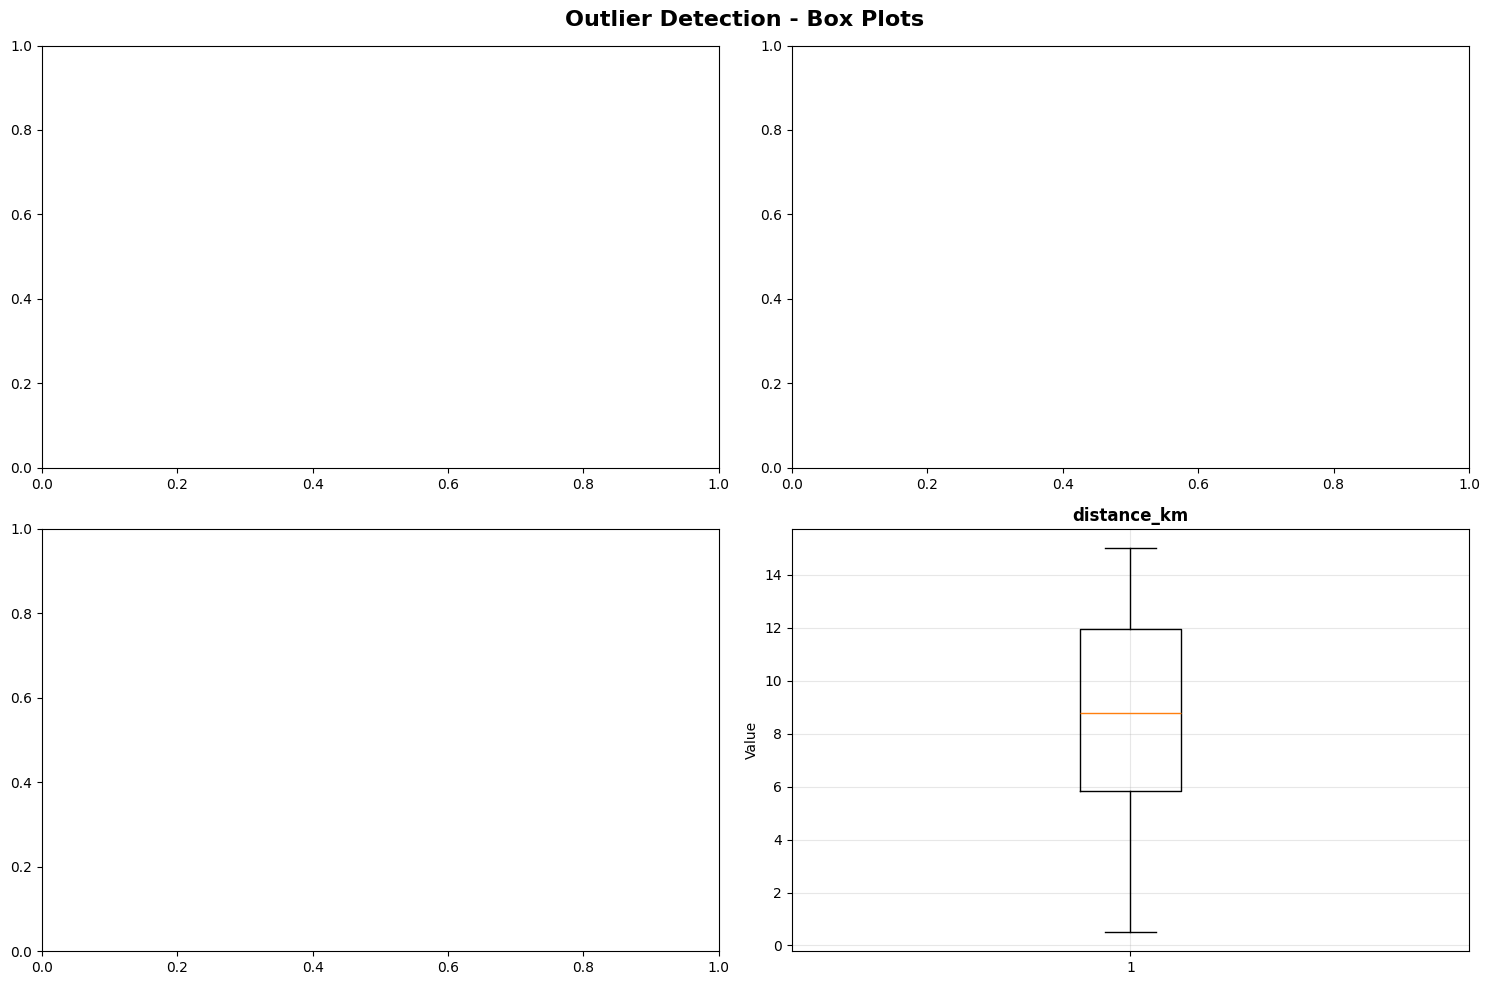

In [8]:
print("\n" + "-"*80)
print(" Outlier detection")
print("-"*80)

outlier_columns = ['preparation_time', 'delivery_time', 'actual_delivery_time', 'distance_km']

def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\n Outlier Analysis:")
outlier_summary = []

for col in outlier_columns:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': round(outlier_pct, 2),
            'Lower_Bound': round(lower, 2),
            'Upper_Bound': round(upper, 2),
            'Min_Value': round(df[col].min(), 2),
            'Max_Value': round(df[col].max(), 2)
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

for idx, col in enumerate(outlier_columns):
    if col in df.columns:
        row = idx // 2
        col_pos = idx % 2
        axes[row, col_pos].boxplot(df[col].dropna())
        axes[row, col_pos].set_title(f'{col}', fontweight='bold')
        axes[row, col_pos].set_ylabel('Value')
        axes[row, col_pos].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outliers_boxplot.png', dpi=300, bbox_inches='tight')
print("\n Box plot saved as 'outliers_boxplot.png'")


In [10]:
print("\n" + "-"*80)
print("Categorical variables validation")
print("-"*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if 'time' not in col.lower() and 'date' not in col.lower()]

print(f"\n Categorical columns: {categorical_cols}")

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n {col}:")
    print(f"  - Unique values: {unique_count}")
    print(f"  - Value counts:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"    • {val}: {count:,} ({percentage:.2f}%)")


--------------------------------------------------------------------------------
Categorical variables validation
--------------------------------------------------------------------------------

 Categorical columns: ['order_id', 'day_of_week', 'restaurant_id', 'restaurant_locality', 'cuisine_type', 'delivery_locality', 'partner_id', 'vehicle_type', 'weather_condition', 'delay_category']

 order_id:
  - Unique values: 5000
  - Value counts:
    • ORD_005000: 1 (0.02%)
    • ORD_000001: 1 (0.02%)
    • ORD_000002: 1 (0.02%)
    • ORD_000003: 1 (0.02%)
    • ORD_000004: 1 (0.02%)
    • ORD_000005: 1 (0.02%)
    • ORD_000006: 1 (0.02%)
    • ORD_000007: 1 (0.02%)
    • ORD_004984: 1 (0.02%)
    • ORD_004983: 1 (0.02%)
    • ORD_004982: 1 (0.02%)
    • ORD_004981: 1 (0.02%)
    • ORD_004980: 1 (0.02%)
    • ORD_004979: 1 (0.02%)
    • ORD_004978: 1 (0.02%)
    • ORD_004977: 1 (0.02%)
    • ORD_004976: 1 (0.02%)
    • ORD_004975: 1 (0.02%)
    • ORD_004974: 1 (0.02%)
    • ORD_004973: 1 (

In [11]:
print("\n" + "-"*80)
print("Timestamp validation")
print("-"*80)

timestamp_cols = ['order_time', 'actual_delivery_time']

print("\n Converting timestamp columns to datetime format...")
for col in timestamp_cols:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col])
            print(f" {col} converted successfully")
            print(f"  - Data type: {df[col].dtype}")
            print(f"  - Range: {df[col].min()} to {df[col].max()}")
        except Exception as e:
            print(f" Error converting {col}: {e}")


--------------------------------------------------------------------------------
Timestamp validation
--------------------------------------------------------------------------------

 Converting timestamp columns to datetime format...


In [13]:
print("\n" + "-"*80)
print("Logical relationship validation")
print("-"*80)

if 'order_time' in df.columns and 'actual_delivery_time' in df.columns:
    invalid_times = df[df['actual_delivery_time'] <= df['order_time']]
    print(f"\n Checking if actual_delivery_time > order_time:")
    print(f"  - Invalid records: {len(invalid_times)} ({(len(invalid_times)/len(df)*100):.2f}%)")
    
    if len(invalid_times) > 0:
        print(" Warning: Found records where delivery time is before or same as order time!")
        print(f"\n  Sample invalid records:")
        print(invalid_times[['order_id', 'order_time', 'actual_delivery_time']].head())
    else:
        print("  All records have valid time sequences!")

time_cols = ['preparation_time', 'delivery_time', 'actual_delivery_time']
for col in time_cols:
    if col in df.columns:
        negative_values = df[df[col] < 0]
        print(f"\n Checking {col} for negative values:")
        print(f"  - Negative values: {len(negative_values)}")
        if len(negative_values) > 0:
            print(f"  Warning: Found negative values in {col}!")

if 'distance_km' in df.columns:
    print(f"\n Distance validation:")
    print(f"  - Min distance: {df['distance_km'].min():.2f} km")
    print(f"  - Max distance: {df['distance_km'].max():.2f} km")
    print(f"  - Mean distance: {df['distance_km'].mean():.2f} km")
    

    long_distances = df[df['distance_km'] > 50]
    print(f"  - Orders > 50km: {len(long_distances)} ({(len(long_distances)/len(df)*100):.2f}%)")



--------------------------------------------------------------------------------
Logical relationship validation
--------------------------------------------------------------------------------

 Distance validation:
  - Min distance: 0.51 km
  - Max distance: 15.00 km
  - Mean distance: 8.80 km
  - Orders > 50km: 0 (0.00%)


In [55]:
print("\n" + "-"*80)
print("STEP 10: MUMBAI AREA & DISTANCE VALIDATION")
print("-"*80)

if 'restaurant_area' in df.columns and 'distance_km' in df.columns:
    print("\n Average distance by restaurant area:")
    area_distance = df.groupby('restaurant_area')['distance_km'].agg(['mean', 'min', 'max', 'std']).round(2)
    area_distance = area_distance.sort_values('mean', ascending=False)
    print(area_distance)
    
    # Visualize
    plt.figure(figsize=(14, 6))
    area_avg = df.groupby('restaurant_area')['distance_km'].mean().sort_values(ascending=False)
    bars = plt.bar(range(len(area_avg)), area_avg.values, color='steelblue', edgecolor='navy', alpha=0.7)
    
    # Add value labels on top of bars
    for i, (bar, value) in enumerate(zip(bars, area_avg.values)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.title('Average Delivery Distance by Restaurant Area in Mumbai', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Restaurant Area', fontsize=12, fontweight='bold')
    plt.ylabel('Average Distance (km)', fontsize=12, fontweight='bold')
    plt.xticks(range(len(area_avg)), area_avg.index, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('distance_by_area.png', dpi=300, bbox_inches='tight')
    print("\n Distance analysis plot saved as 'distance_by_area.png'")
    plt.close()



--------------------------------------------------------------------------------
STEP 10: MUMBAI AREA & DISTANCE VALIDATION
--------------------------------------------------------------------------------


In [54]:
print("\n" + "-"*80)
print("STEP 11: CREATING DELAY METRICS")
print("-"*80)

# Check what columns exist for delay calculation
print("\n Checking available columns for delay calculation:")
print(f"  - Columns in dataset: {df.columns.tolist()}")

# Option 1: If you have actual_delivery_time (timestamp) and delivery_time (expected time in minutes)
if 'actual_delivery_time' in df.columns and 'delivery_time' in df.columns:
    
    # Check data types
    print(f"\n Data types:")
    print(f"  - actual_delivery_time: {df['actual_delivery_time'].dtype}")
    print(f"  - delivery_time: {df['delivery_time'].dtype}")
    
    # If actual_delivery_time is datetime and delivery_time is numeric (expected minutes)
    if pd.api.types.is_datetime64_any_dtype(df['actual_delivery_time']):
        # Calculate actual time taken from order to delivery
        if 'order_time' in df.columns:
            df['actual_time_taken'] = (df['actual_delivery_time'] - df['order_time']).dt.total_seconds() / 60
            df['delay_minutes'] = df['actual_time_taken'] - df['delivery_time']
            print("\n✓ Method: Calculated actual time from order_time to actual_delivery_time")
        else:
            print("\n  Warning: Need order_time to calculate actual duration")
    else:
        # Both are numeric (minutes)
        df['delay_minutes'] = df['actual_delivery_time'] - df['delivery_time']
        print("\n✓ Method: Direct subtraction (both columns are numeric)")
    
    # Create binary classification
    df['is_delayed'] = (df['delay_minutes'] > 0).astype(int)
    
    print("\n✓ Created new columns:")
    if 'actual_time_taken' in df.columns:
        print("  - actual_time_taken: Time from order to delivery (minutes)")
    print("  - delay_minutes: Difference between actual and expected delivery time")
    print("  - is_delayed: Binary indicator (1 = delayed, 0 = on-time)")
    
    # Remove any infinite or NaN values for statistics
    delay_clean = df['delay_minutes'].replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(delay_clean) > 0:
        print(f"\n Delay Statistics:")
        print(f"  - Average delay: {delay_clean.mean():.2f} minutes")
        print(f"  - Median delay: {delay_clean.median():.2f} minutes")
        print(f"  - Std deviation: {delay_clean.std():.2f} minutes")
        print(f"  - Min delay: {delay_clean.min():.2f} minutes")
        print(f"  - Max delay: {delay_clean.max():.2f} minutes")
        print(f"  - Orders delayed: {df['is_delayed'].sum():,} ({(df['is_delayed'].mean()*100):.2f}%)")
        print(f"  - Orders on-time/early: {(~df['is_delayed'].astype(bool)).sum():,} ({((1-df['is_delayed'].mean())*100):.2f}%)")
        
        # Visualize delay distribution
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Histogram of delay minutes
        axes[0].hist(delay_clean, bins=50, color='coral', edgecolor='black', alpha=0.7)
        axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='On-time threshold')
        axes[0].set_xlabel('Delay (minutes)', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
        axes[0].set_title('Distribution of Delivery Delays', fontsize=14, fontweight='bold')
        axes[0].legend(fontsize=10)
        axes[0].grid(True, alpha=0.3)
        
        # Add statistics text box
        stats_text = f'Mean: {delay_clean.mean():.1f} min\nMedian: {delay_clean.median():.1f} min'
        axes[0].text(0.98, 0.97, stats_text, transform=axes[0].transAxes,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                    fontsize=10)
        
        # Pie chart of delayed vs on-time
        delay_counts = df['is_delayed'].value_counts().sort_index()
        colors = ['#2ecc71', '#e74c3c']
        labels = ['On-Time/Early', 'Delayed']
        
        # Ensure we have the right order
        explode = (0, 0.1)  # Explode the delayed slice
        
        axes[1].pie(delay_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, 
                    colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'},
                    explode=explode, shadow=True)
        axes[1].set_title(f'Orders: On-Time vs Delayed\n(Total: {len(df):,} orders)', 
                         fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('delay_analysis.png', dpi=300, bbox_inches='tight')
        print("\n  Delay analysis plot saved as 'delay_analysis.png'")
        plt.close()
        
        # Additional delay insights
        print("\n Additional Delay Insights:")
        severe_delays = len(df[df['delay_minutes'] > 30])
        print(f"  - Severe delays (>30 min): {severe_delays:,} ({(severe_delays/len(df)*100):.2f}%)")
        minor_delays = len(df[(df['delay_minutes'] > 0) & (df['delay_minutes'] <= 15)])
        print(f"  - Minor delays (0-15 min): {minor_delays:,} ({(minor_delays/len(df)*100):.2f}%)")
        early_deliveries = len(df[df['delay_minutes'] < 0])
        print(f"  - Early deliveries: {early_deliveries:,} ({(early_deliveries/len(df)*100):.2f}%)")
    else:
        print("\n Warning: No valid delay data found after cleaning!")
        
else:
    print("\n Warning: Required columns 'actual_delivery_time' and 'delivery_time' not found!")
    print("  Available columns:", df.columns.tolist())


--------------------------------------------------------------------------------
STEP 11: CREATING DELAY METRICS
--------------------------------------------------------------------------------

 Checking available columns for delay calculation:
  - Columns in dataset: ['order_id', 'order_datetime', 'day_of_week', 'hour_of_day', 'is_weekend', 'is_peak_hour', 'month', 'restaurant_id', 'restaurant_locality', 'cuisine_type', 'delivery_locality', 'distance_km', 'partner_id', 'vehicle_type', 'partner_experience_months', 'weather_condition', 'order_value_inr', 'estimated_prep_time_min', 'estimated_delivery_time_min', 'actual_delivery_time_min', 'estimated_delivery_datetime', 'actual_delivery_datetime', 'delay_minutes', 'is_delayed', 'delay_category', 'distance_bin', 'experience_bin', 'value_bin']

  Available columns: ['order_id', 'order_datetime', 'day_of_week', 'hour_of_day', 'is_weekend', 'is_peak_hour', 'month', 'restaurant_id', 'restaurant_locality', 'cuisine_type', 'delivery_locality'

In [53]:
df.to_csv('food_delivery_cleaned.csv', index=False)
print("Cleaned data saved as 'food_delivery_cleaned.csv'")

Cleaned data saved as 'food_delivery_cleaned.csv'


In [32]:
print("\n Loading cleaned dataset...")
df = pd.read_csv('food_delivery_cleaned.csv')


if 'order_datetime' in df.columns:
    df['order_datetime'] = pd.to_datetime(
    df['order_datetime'],
    dayfirst=True
)

if 'estimated_delivery_datetime' in df.columns:
    df['estimated_delivery_datetime'] = pd.to_datetime(
    df['estimated_delivery_datetime'],
    dayfirst=True
    )
if 'actual_delivery_datetime' in df.columns:
    df['actual_delivery_datetime'] = pd.to_datetime(
        df['actual_delivery_datetime'],
        dayfirst=True,
        errors='coerce'
    )

    
print(f" Loaded {len(df):,} records")


 Loading cleaned dataset...
 Loaded 5,000 records


In [52]:
print("\n" + "-"*80)
print("ANALYSIS 1: PEAK HOUR IMPACT ON DELAYS")
print("-"*80)

if 'is_peak_hour' in df.columns:
    peak_analysis = df.groupby('is_peak_hour').agg({
        'delay_minutes': ['mean', 'median', 'std'],
        'is_delayed': ['sum', 'mean', 'count']
    }).round(2)
    
    print("\n Peak Hour vs Non-Peak Hour Comparison:")
    print(peak_analysis)
    
    peak_delay_pct = df[df['is_peak_hour'] == 1]['is_delayed'].mean() * 100
    non_peak_delay_pct = df[df['is_peak_hour'] == 0]['is_delayed'].mean() * 100
    difference = peak_delay_pct - non_peak_delay_pct
    
    print(f"\n Key Findings:")
    print(f"  - Peak hour delay %: {peak_delay_pct:.2f}%")
    print(f"  - Non-peak hour delay %: {non_peak_delay_pct:.2f}%")
    print(f"  - Difference: {difference:.2f} percentage points")
    
elif 'hour_of_day' in df.columns:
    # Define peak hours (12-14 for lunch, 19-21 for dinner)
    df['is_peak_hour'] = df['hour_of_day'].isin([12, 13, 14, 19, 20, 21]).astype(int)
    
    hourly_delays = df.groupby('hour_of_day').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'order_id': 'count'
    }).round(2)
    hourly_delays.columns = ['Avg_Delay_Min', 'Delay_Percentage', 'Order_Count']
    
    print("\n Hourly Delay Analysis:")
    print(hourly_delays)



--------------------------------------------------------------------------------
ANALYSIS 1: PEAK HOUR IMPACT ON DELAYS
--------------------------------------------------------------------------------

 Peak Hour vs Non-Peak Hour Comparison:
             delay_minutes               is_delayed            
                      mean median    std        sum  mean count
is_peak_hour                                                   
False                 4.97    2.0  12.43       1629  0.57  2853
True                 19.03   16.0  17.65       1971  0.92  2147

 Key Findings:
  - Peak hour delay %: 91.80%
  - Non-peak hour delay %: 57.10%
  - Difference: 34.70 percentage points


In [51]:
print("\n" + "-"*80)
print("ANALYSIS 2: WEATHER CONDITION IMPACT")
print("-"*80)

if 'weather_condition' in df.columns:
    weather_analysis = df.groupby('weather_condition').agg({
        'delay_minutes': ['mean', 'median', 'std'],
        'is_delayed': ['mean', 'count'],
        'order_id': 'count'
    }).round(2)
    
    print("\n Weather Condition Analysis:")
    print(weather_analysis)
    
    # Calculate percentage increase during bad weather
    weather_delay_pct = df.groupby('weather_condition')['is_delayed'].mean() * 100
    print("\n Delay Percentage by Weather:")
    for weather, pct in weather_delay_pct.items():
        print(f"  - {weather}: {pct:.2f}%")
    
    # Check for monsoon/rainy weather impact
    if 'Rainy' in weather_delay_pct.index or 'Rain' in weather_delay_pct.index:
        rainy_key = 'Rainy' if 'Rainy' in weather_delay_pct.index else 'Rain'
        clear_key = 'Clear' if 'Clear' in weather_delay_pct.index else weather_delay_pct.index[0]
        
        monsoon_increase = ((weather_delay_pct[rainy_key] - weather_delay_pct[clear_key]) / 
                           weather_delay_pct[clear_key] * 100)
        
        print(f"\n KEY INSIGHT:")
        print(f"  Delays during {rainy_key} weather are {monsoon_increase:.1f}% higher than {clear_key} weather")
        


--------------------------------------------------------------------------------
ANALYSIS 2: WEATHER CONDITION IMPACT
--------------------------------------------------------------------------------

 Weather Condition Analysis:
                  delay_minutes               is_delayed       order_id
                           mean median    std       mean count    count
weather_condition                                                      
Clear                      6.19    5.0  11.30       0.65   589      589
Cloudy                     6.66    5.0  11.82       0.66  1966     1966
Heavy rains               36.84   32.0  24.20       0.99   462      462
Light rains               14.04   12.0  13.88       0.83  1125     1125
Rainy                      6.37    4.0  12.17       0.62   858      858

 Delay Percentage by Weather:
  - Clear: 65.37%
  - Cloudy: 65.56%
  - Heavy rains: 99.13%
  - Light rains: 82.84%
  - Rainy: 62.47%

 KEY INSIGHT:
  Delays during Rainy weather are -4.4% highe

In [49]:
print("\n" + "-"*80)
print("ANALYSIS 3: DISTANCE & LOCALITY IMPACT")
print("-"*80)

if 'restaurant_locality' in df.columns:
    locality_analysis = df.groupby('restaurant_locality').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'distance_km': 'mean',
        'order_id': 'count'
    }).round(2)
    locality_analysis.columns = ['Avg_Delay', 'Delay_Pct', 'Avg_Distance', 'Order_Count']
    locality_analysis = locality_analysis.sort_values('Delay_Pct', ascending=False)
    
    print("\n Top 10 Localities with Highest Delays:")
    print(locality_analysis.head(10))

# Distance bins analysis
df['distance_bin'] = pd.cut(df['distance_km'], bins=[0, 3, 5, 8, 12, 100], 
                             labels=['0-3km', '3-5km', '5-8km', '8-12km', '12+km'])

distance_analysis = df.groupby('distance_bin').agg({
    'delay_minutes': 'mean',
    'is_delayed': 'mean',
    'order_id': 'count'
}).round(2)

print("\n Delay by Distance Range:")
print(distance_analysis)


--------------------------------------------------------------------------------
ANALYSIS 3: DISTANCE & LOCALITY IMPACT
--------------------------------------------------------------------------------

 Top 10 Localities with Highest Delays:
                     Avg_Delay  Delay_Pct  Avg_Distance  Order_Count
restaurant_locality                                                 
Malad West               11.18       0.79          9.28          104
Andheri East             11.34       0.78          8.56          220
Borivali West            12.72       0.78          8.38           54
Vikhroli                 12.46       0.78          9.13          217
Malad East               11.51       0.77          8.49           73
Jogeshwari               15.02       0.76          8.58           51
Bandra West              13.21       0.75          9.53          121
Marine lines             12.17       0.75          8.74          218
CSMT                     13.27       0.75          9.66           5

In [47]:
print("\n" + "-"*80)
print("ANALYSIS 4: CUISINE TYPE PERFORMANCE")
print("-"*80)

if 'cuisine_type' in df.columns:
    cuisine_analysis = df.groupby('cuisine_type').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'estimated_prep_time_min': 'mean',
        'order_id': 'count'
    }).round(2)
    cuisine_analysis.columns = ['Avg_Delay', 'Delay_Pct', 'Avg_Prep_Time', 'Order_Count']
    cuisine_analysis = cuisine_analysis.sort_values('Delay_Pct', ascending=False)
    
    print("\n Cuisine Performance (sorted by delay %):")
    print(cuisine_analysis)


--------------------------------------------------------------------------------
ANALYSIS 4: CUISINE TYPE PERFORMANCE
--------------------------------------------------------------------------------

 Cuisine Performance (sorted by delay %):
                     Avg_Delay  Delay_Pct  Avg_Prep_Time  Order_Count
cuisine_type                                                         
Japanese                 11.91       0.76          20.50          284
Lebanese                 12.59       0.75          21.03          300
South indian             12.36       0.74          21.57          244
Beverages                10.92       0.74          20.89          508
Desserts                 11.39       0.73          21.90          267
Continental              10.71       0.73          21.09          136
Mughlai                  10.69       0.73          22.97          243
Asian                    11.65       0.73          19.30          285
Fast food                11.58       0.72          21.53 

In [46]:
print("\n" + "-"*80)
print("ANALYSIS 5: DAY OF WEEK PATTERNS")
print("-"*80)

if 'day_of_week' in df.columns:
    # Define day order
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    daily_analysis = df.groupby('day_of_week').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'order_id': 'count'
    }).round(2)
    daily_analysis.columns = ['Avg_Delay', 'Delay_Pct', 'Order_Count']
    
    # Reorder by day of week
    daily_analysis = daily_analysis.reindex([d for d in day_order if d in daily_analysis.index])
    
    print("\n Daily Performance:")
    print(daily_analysis)

if 'is_weekend' in df.columns:
    weekend_analysis = df.groupby('is_weekend').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'order_id': 'count'
    }).round(2)
    
    print("\n Weekend vs Weekday:")
    print(weekend_analysis)


--------------------------------------------------------------------------------
ANALYSIS 5: DAY OF WEEK PATTERNS
--------------------------------------------------------------------------------

 Daily Performance:
             Avg_Delay  Delay_Pct  Order_Count
day_of_week                                   
Monday           11.78       0.76          732
Tuesday          11.73       0.74          703
Wednesday        11.03       0.72          727
Thursday         11.53       0.74          690
Friday           11.46       0.71          729
Saturday         10.20       0.69          703
Sunday            9.31       0.67          716

 Weekend vs Weekday:
            delay_minutes  is_delayed  order_id
is_weekend                                     
False               11.50        0.74      3581
True                 9.75        0.68      1419


In [44]:
print("\n" + "-"*80)
print("ANALYSIS 6: DELIVERY PARTNER ANALYSIS")
print("-"*80)

if 'vehicle_type' in df.columns:
    vehicle_analysis = df.groupby('vehicle_type').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'distance_km': 'mean',
        'order_id': 'count'
    }).round(2)
    
    print("\n Vehicle Type Performance:")
    print(vehicle_analysis)

if 'partner_experience_months' in df.columns:
    # Create experience bins
    df['experience_bin'] = pd.cut(df['partner_experience_months'], 
                                   bins=[0, 6, 12, 24, 100],
                                   labels=['0-6 months', '6-12 months', '1-2 years', '2+ years'])
    
    experience_analysis = df.groupby('experience_bin').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'order_id': 'count'
    }).round(2)
    
    print("\n Partner Experience Impact:")
    print(experience_analysis)



--------------------------------------------------------------------------------
ANALYSIS 6: DELIVERY PARTNER ANALYSIS
--------------------------------------------------------------------------------

 Vehicle Type Performance:
              delay_minutes  is_delayed  distance_km  order_id
vehicle_type                                                  
Bicycle               17.46        0.89         8.71      1392
Bike                   8.26        0.66         8.85      1806
Scooty                 8.77        0.65         8.83      1802

 Partner Experience Impact:
                delay_minutes  is_delayed  order_id
experience_bin                                     
0-6 months              19.23        0.87       343
6-12 months             11.79        0.74       382
1-2 years               13.12        0.77       990
2+ years                 9.42        0.69      3285


In [ ]:
print("\n" + "-"*80)
print("ANALYSIS 7: Order value analysis")
print("-"*80)

if 'order_value_inr' in df.columns:
    # Create value bins
    df['value_bin'] = pd.cut(df['order_value_inr'], 
                              bins=[0, 200, 400, 600, 10000],
                              labels=['₹0-200', '₹200-400', '₹400-600', '₹600+'])
    
    value_analysis = df.groupby('value_bin').agg({
        'delay_minutes': 'mean',
        'is_delayed': 'mean',
        'order_id': 'count'
    }).round(2)
    
    print("\nOr der Value Impact:")
    print(value_analysis)
    
    # Correlation
    correlation = df[['order_value_inr', 'delay_minutes']].corr().iloc[0, 1]
    print(f"\n Correlation between order value and delay: {correlation:.3f}")


ANALYSIS 7: ORDER VALUE ANALYSIS

Or der Value Impact:
           delay_minutes  is_delayed  order_id
value_bin                                     
₹0-200               NaN         NaN         0
₹200-400           10.84        0.70       771
₹400-600           11.50        0.72       772
₹600+              10.93        0.72      3457

 Correlation between order value and delay: -0.013


In [ ]:
print("\n" + "-"*80)
print("Creating visualizations")
print("-"*80)

# VISUALIZATION 1: Peak Hour Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Hourly delay pattern
if 'hour_of_day' in df.columns:
    hourly_data = df.groupby('hour_of_day')['delay_minutes'].mean()
    axes[0, 0].plot(hourly_data.index, hourly_data.values, marker='o', linewidth=2, 
                    markersize=8, color='#e74c3c')
    axes[0, 0].axhspan(12, 14, alpha=0.2, color='orange', label='Lunch Peak')
    axes[0, 0].axhspan(19, 21, alpha=0.2, color='red', label='Dinner Peak')
    axes[0, 0].set_xlabel('Hour of Day', fontweight='bold', fontsize=11)
    axes[0, 0].set_ylabel('Average Delay (minutes)', fontweight='bold', fontsize=11)
    axes[0, 0].set_title('Average Delay by Hour of Day', fontweight='bold', fontsize=13)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()

# 2. Weather impact
if 'weather_condition' in df.columns:
    weather_data = df.groupby('weather_condition')['is_delayed'].mean() * 100
    bars = axes[0, 1].bar(range(len(weather_data)), weather_data.values, 
                          color=['#3498db', '#e74c3c', '#f39c12', '#2ecc71'][:len(weather_data)])
    axes[0, 1].set_xticks(range(len(weather_data)))
    axes[0, 1].set_xticklabels(weather_data.index, rotation=45, ha='right')
    axes[0, 1].set_ylabel('Delay Percentage (%)', fontweight='bold', fontsize=11)
    axes[0, 1].set_title('Delay % by Weather Condition', fontweight='bold', fontsize=13)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')


distance_data = df.groupby('distance_bin')['delay_minutes'].mean()
axes[1, 0].bar(range(len(distance_data)), distance_data.values, color='steelblue', alpha=0.7)
axes[1, 0].set_xticks(range(len(distance_data)))
axes[1, 0].set_xticklabels(distance_data.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Average Delay (minutes)', fontweight='bold', fontsize=11)
axes[1, 0].set_title('Delay by Distance Range', fontweight='bold', fontsize=13)
axes[1, 0].grid(axis='y', alpha=0.3)


if 'day_of_week' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_delay = df.groupby('day_of_week')['is_delayed'].mean() * 100
    daily_delay = daily_delay.reindex([d for d in day_order if d in daily_delay.index])
    
    colors = ['#3498db']*5 + ['#e74c3c']*2  # Blue for weekdays, red for weekends
    axes[1, 1].bar(range(len(daily_delay)), daily_delay.values, color=colors[:len(daily_delay)])
    axes[1, 1].set_xticks(range(len(daily_delay)))
    axes[1, 1].set_xticklabels(daily_delay.index, rotation=45, ha='right')
    axes[1, 1].set_ylabel('Delay Percentage (%)', fontweight='bold', fontsize=11)
    axes[1, 1].set_title('Delay % by Day of Week', fontweight='bold', fontsize=13)
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Food Delivery Delay Analysis - Key Insights', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('phase2_key_insights.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: phase2_key_insights.png")
plt.close()

# VISUALIZATION 2: Correlation Heatmap
numeric_cols = ['delay_minutes', 'distance_km', 'estimated_prep_time_min', 
                'actual_delivery_time_min', 'order_value_inr']
numeric_cols = [col for col in numeric_cols if col in df.columns]

if len(numeric_cols) > 2:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Delivery Metrics', fontweight='bold', fontsize=14, pad=15)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: correlation_heatmap.png")
    plt.close()


CREATING COMPREHENSIVE VISUALIZATIONS

✓ Saved: phase2_key_insights.png
✓ Saved: correlation_heatmap.png
